# Non PC Tangle Data

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t2 = Tangle(rate=1, tip_selection='mcmc', plot=True)
    ng2 = node_graph(t2)
    w2 = watcher(t2, ng2, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng2.new_node()

    while t2.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t2.rate)
        t2.time += dt_time
        ng2.nodes[node].issue_transaction()
        w2.update()
        print(t2.time)

    w2.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000256E16B16D0>]
Edges []
Node IDS [0]
Weights [[0, 1236, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000256E16B16D0>, <tangle.node object at 0x00000256E33F5BE0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1236, 1], [1, 1980, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000256E16B16D0>, <tangle.node object at 0x00000256E33F5BE0>, <tangle.node object at 0x00000256E36A5EE0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 1236, 1], [1, 1980, 1], [2, 342, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000256E16B16D0>, <tangle.node object at 0x00000256E33F5BE0>, <tangle.node object at 0x00000256E36A5EE0>, <tangle.node object at 0x00000256E3131040>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1236, 1], [1, 1980, 1], [2, 342, 1], [3, 986, 1]]
--------

[[1, 1.0, 106], [2, 1.0, 46], [3, 1.0, 52], [4, 1.0, 51], [5, 1.0, 39], [6, 1.0, 51], [7, 1.0, 43], [8, 1.0363636363636364, 55], [9, 1.1730769230769231, 52], [10, 1.1162790697674418, 43], [11, 1.28125, 64], [12, 1.368421052631579, 57], [13, 1.6595744680851063, 47], [14, 1.9807692307692308, 52], [15, 2.022222222222222, 45], [16, 2.7254901960784315, 51], [17, 3.0, 54], [18, 2.9523809523809526, 42], [19, 3.9473684210526314, 57], [20, 4.0476190476190474, 42], [21, 4.8979591836734695, 49], [22, 5.032786885245901, 61], [23, 5.0, 51], [24, 6.177777777777778, 45], [25, 7.195652173913044, 46], [26, 7.241379310344827, 58], [27, 8.196078431372548, 51], [28, 8.309090909090909, 55], [29, 9.813953488372093, 43], [30, 10.134615384615385, 52], [31, 9.934782608695652, 46], [32, 11.038461538461538, 52], [33, 11.1875, 48], [34, 11.955555555555556, 45], [35, 12.346153846153847, 52], [36, 12.54, 50], [37, 13.205128205128204, 39], [38, 13.389830508474576, 59], [39, 14.28888888888889, 45], [40, 14.6727272727

Text(0, 0.5, 'Confirmations')

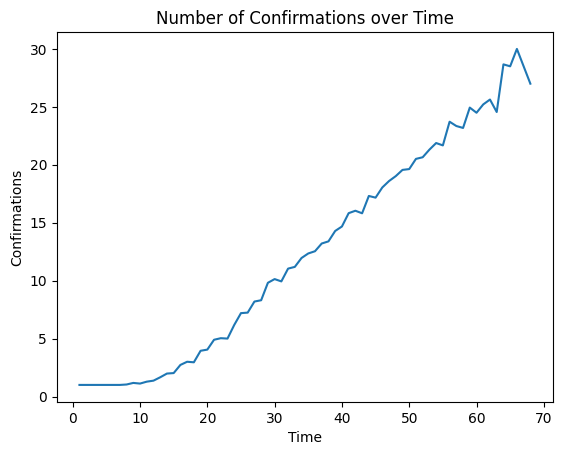

In [3]:
a2 = analyser()
results2 = a2.get_res(100)
df2 = pd.DataFrame(results2)
confirmed2 = df2[1].tolist()
times2 = df2[0].tolist()
plt.plot(times2, confirmed2)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [4]:
df2.to_csv("Non-PC-r1 100")